#### Prelude

In [1]:
<< "MaTeX`"
<< "~/Documents/Wolfram/Maxima_Minima.wls"
<< "~/Documents/Wolfram/Optics_Mie.wls"
<< "~/Documents/Wolfram/Optical_functions/Au_JohnsnChristy.wls"

In [5]:
fs = 9;

texStyle := {FontFamily -> "Latin Modern Roman", FontSize -> fs, Black};
graphsOpts := {Mesh -> Full, BaseStyle -> texStyle, Frame -> True, 
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3]}
            
SetOptions[ListLinePlot, graphsOpts];

graphsOptsPolar := {Mesh -> Full, BaseStyle -> texStyle,  PolarAxes -> True ,
            FrameStyle -> Black, ImageSize -> 215, PlotStyle -> ColorData[3], Frame -> False, PolarGridLines -> Automatic, Joined -> True}
SetOptions[ListPolarPlot, graphsOptsPolar];

### CrosFulls Sections

In [632]:
radius = 12.5;

ampFactor = 100;
plots = ConstantArray[0, {2, 2}];
ar = 1/2.25;

#### No size Correction

In [636]:
nNP = JohnsonChristyAuRef;

wlength = Range[400, 700, 2.5];
max = scaQ = extQ = {0, 0};

scaFunc[lda_] := Map[ampFactor*MieScatteringQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];
extFunc[lda_] := Map[MieExtinctionQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];

In [641]:
i = 1;
ampFact = 5;

nMat = 1. &;
extQ[[i]] = ampFact * extFunc[wlength];
scaQ[[i]] = ampFact * scaFunc[wlength];
max[[i]] =  {1,ampFact} * FindExtrema[#, wlength[[{1, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};
max[[i]]
i++;
nMat = 1.5 &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{10, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};
max[[i]]
max = Transpose[max];


{{507.787, 2.7492}, {521.302, 2.13874}}
{{536.284, 2.75502}, {543.06, 7.42441}}

{-Graphics-, -Graphics-}
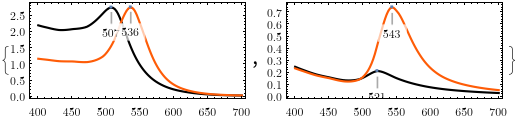

In [631]:
plots[[1]] = MapThread[
                        Show[{
                            ListLinePlot[#, 
                                            AspectRatio -> ar, 
                                            Mesh -> None, 
                                            DataRange -> wlength[[{1, -1}]],
                                            ImageSize -> 180,
                                            PlotRange -> All
                                        ],
                            ListPlot[Callout[#,  ToString[IntegerPart@#[[1]]], Below ] & /@ #2]
                             }, 
                             PlotRange -> All] &, {{extQ, scaQ}, max}]

#### Size Correction

In [579]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;

wlength = Range[400, 700, 2.5];
max = scaQ = extQ = {0, 0};

scaFunc[lda_] := Map[ampFactor*MieScatteringQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];
extFunc[lda_] := Map[MieExtinctionQ[{nMat[#], nNP[#]}, #, radius] &, toMap[lda]];

In [584]:
i = 1;
ampFact = 5;

nMat = 1. &;
extQ[[i]] = ampFact * extFunc[wlength];
scaQ[[i]] = ampFact * scaFunc[wlength];
max[[i]] =  {1,ampFact} * FindExtrema[#, wlength[[{1, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

i++;
nMat = 1.5 &;
extQ[[i]] = extFunc[wlength];
scaQ[[i]] = scaFunc[wlength];
max[[i]] = FindExtrema[#, wlength[[{10, -1}]], 10., "Maxima"][[1,1]] & /@ {extFunc, scaFunc};

max = Transpose[max];

{-Graphics-, -Graphics-}
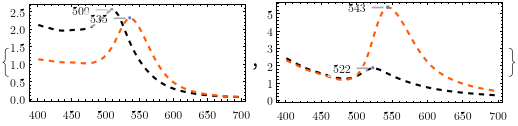

In [596]:
plots[[2]] = MapThread[
                        Show[{
                            ListLinePlot[#, PlotStyle -> {Directive[ColorData[3, 1], Dashed], Directive[ColorData[3, 2], Dashed]},
                                            AspectRatio -> ar, 
                                            Mesh -> None, 
                                            ImageSize -> 180,
                                            DataRange -> wlength[[{1, -1}]]
                                        ],
                            ListPlot[Callout[#, ToString[IntegerPart@#[[1]]] , Left] & /@ #2]
                             }, 
                             PlotRange -> All] &, {{extQ, scaQ}, max}]

#### Semi - final plots

{-Graphics-, -Graphics-}
1-Ext-12nm5-AirGlass.pdf
1-Sca-12nm5-AirGlass.pdf
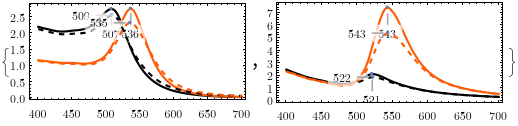

In [601]:
expPlots = Show[#, PlotRange -> All ]& /@  Transpose @ plots
Export["1-Ext-12nm5-AirGlass.pdf" , expPlots[[1]] ]
Export["1-Sca-12nm5-AirGlass.pdf" , expPlots[[2]] ]

### ScatteringPlots

{0, 30, 45, 60, 90, 120, 135, 150, 180, 210, 225, 240, 270, 300, 315, 330}
  Pi                   Pi                           Pi
{{--, 0}, {30 Degree + --, 30 Degree}, {45 Degree + --, 45 Degree}, 
  2                    2                            2
 
                 Pi                           Pi
>   {60 Degree + --, 60 Degree}, {90 Degree + --, 90 Degree}, 
                 2                            2
 
                  Pi                             Pi
>   {120 Degree + --, 120 Degree}, {135 Degree + --, 135 Degree}, 
                  2                              2
 
                  Pi                             Pi
>   {150 Degree + --, 150 Degree}, {180 Degree + --, 180 Degree}, 
                  2                              2
 
                  Pi                             Pi
>   {210 Degree + --, 210 Degree}, {225 Degree + --, 225 Degree}, 
                  2                              2
 
                  Pi                             Pi
>   {240 Degree + --, 240 Degree}, {270 Degree + --, 270 Degree}, 
                  2                              2
 
                  Pi                             Pi
>   {300 Degree + --, 300 Degree}, {315 Degree + --, 315 Degree}, 
                  2                              2
 
                  Pi
>   {330 Degree + --, 330 Degree}}
                  2
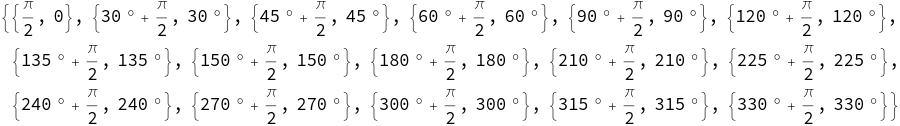

In [363]:
radius = 12.5;

plots = ConstantArray[0, {2}];
ar = 1;

Flatten@Table[qq*90 + {0, 30 , 45, 60}, {qq,0,3}]
pTiks = {Degree*# + Pi/2, # Degree } &/@ %

#### Air

In [338]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;
nMat = 1.& ;
wlength = 509;
angle = Range[ 0. , 2 Pi, .05];


m := nNP[wlength] / nMat[wlength] ;
x := (2.*Pi*radius)*nMat[wlength] /wlength;
scaBaloon[ang_] :=  Map[MieScatteringAmplitude12[x, m, #]&, toMap[ang]];

-Graphics-
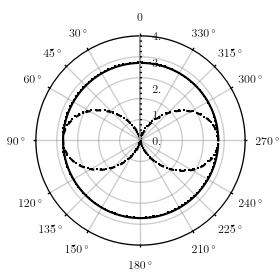

In [372]:
ampFactor = 100000;

data = ampFactor*Chop[#*Conjugate[#]] &@ scaBaloon[angle];
data = Transpose[data];

plots[[1]] = ListPolarPlot[data, PlotRange-> Max[Flatten@data]*1.8 ,
                            PolarAxesOrigin -> {Pi/2, 3.5},
                            PlotStyle -> {Directive[Black], Directive[Black,Dashed]},
                            PolarTicks -> {pTiks, Automatic},
                            ImageSize -> 210
                            ]

#### H2O

In [376]:
nNP = JohnsonChristyAuRefSize[ #, radius ]&;
nMat = 1.33& ;
wlength = 524;
angle = Range[ 0. , 2 Pi, .05];

m := nNP[wlength] / nMat[wlength] ;
x := (2.*Pi*radius)*nMat[wlength] /wlength;
scaBaloon[ang_] := Map[MieScatteringAmplitude12[x, m, #]&, toMap[ang]];

-Graphics-
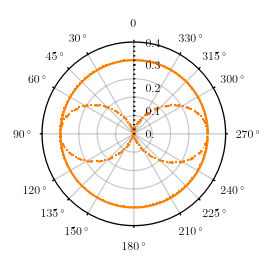

In [383]:
ampFactor = 1000;

data = ampFactor*Chop[#*Conjugate[#]] &@ scaBaloon[angle];
data = Transpose[data];

plots[[2]] = ListPolarPlot[data, PlotRange->  Max[Flatten@data]*1.8 ,
                            PlotStyle -> {Directive[Orange], Directive[Orange,Dashed]},
                            Joined->True,
                            PolarTicks -> {pTiks, Automatic},
                            ImageSize -> 200
                            ]

### Plots

In [387]:
Export["S-12--5nm-Au-in-Air.pdf" , plots[[1]] ]
Export["S-12--5nm-Au-in-H2O.pdf" , plots[[2]] ]

S-12--5nm-Au-in-Air.pdf
S-12--5nm-Au-in-H2O.pdf